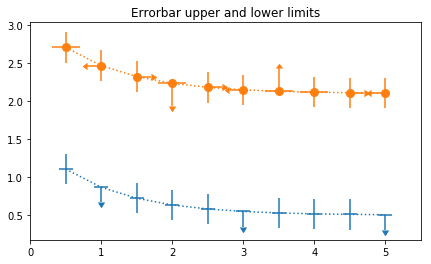

In [7]:
"""
===========================================================
Demo of how to include upper and lower limits in error bars
===========================================================

In matplotlib, errors bars can have "limits". Applying limits to the
error bars essentially makes the error unidirectional. Because of that,
upper and lower limits can be applied in both the y- and x-directions
via the ``uplims``, ``lolims``, ``xuplims``, and ``xlolims`` parameters,
respectively. These parameters can be scalar or boolean arrays.

For example, if ``xlolims`` is ``True``, the x-error bars will only
extend from the data towards increasing values. If ``uplims`` is an
array filled with ``False`` except for the 4th and 7th values, all of the
y-error bars will be bidirectional, except the 4th and 7th bars, which
will extend from the data towards decreasing y-values.
"""

import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.exp(-x)
xerr = 0.1
yerr = 0.2

# lower & upper limits of the error
lolims = np.array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=bool)
uplims = np.array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=bool)
ls = 'dotted'

fig, ax = plt.subplots(figsize=(7, 4))

# standard error bars
# ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls)

# # including upper limits
ax.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims,
            linestyle=ls)

# # including lower limits
# ax.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims,
#             linestyle=ls)

# # including upper and lower limits
# ax.errorbar(x, y + 1.5, xerr=xerr, yerr=yerr,
#             lolims=lolims, uplims=uplims,
#             marker='o', markersize=8,
#             linestyle=ls)

# Plot a series with lower and upper limits in both x & y
# constant x-error with varying y-error
xerr = 0.2
yerr = np.zeros(x.shape) + 0.2
yerr[[3, 6]] = 0.3

# mock up some limits by modifying previous data
xlolims = lolims
xuplims = uplims
lolims = np.zeros(x.shape)
uplims = np.zeros(x.shape)
lolims[[6]] = True  # only limited at this index
uplims[[3]] = True  # only limited at this index

# do the plotting
ax.errorbar(x, y + 2.1, xerr=xerr, yerr=yerr,
            xlolims=xlolims, xuplims=xuplims,
            uplims=uplims, lolims=lolims,
            marker='o', markersize=8,
            linestyle=ls)

# tidy up the figure
ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()